# Laboratory work #3

Hi there, in this work your goal is to get yourself familiar with different metrics and algorithims. And the way to compare them.

You can collaborate with your teammate to complete this laboratory work - in a team <b>of 2 students.</b>

## Task 1 Introduction

1. Create a team of two students and choose a dataset suitable for classification task. You can use www.kaggle.com or any similar resources of datasets. But, you also can use Titanic Dataset, as it addresses classification task.

2. Describe you dataset - what kind of information does it contain, what are the features, what is the target value?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Breast_cancer_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [4]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [5]:
df.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

<BarContainer object of 2 artists>

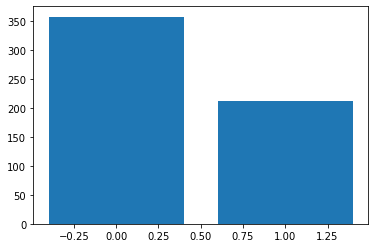

In [6]:
plt.bar(x=df.diagnosis.unique(), height=df.diagnosis.value_counts()) 

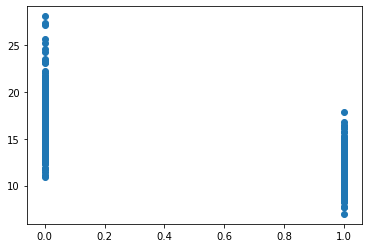

In [7]:
plt.scatter(df.diagnosis, df['mean_radius'])

## Task 2 Data preprocessing

Perform preprocessing on your data - get rid of NANs, outliers and corrupted data, encode categorical data and perform scaling if necessary. You can use your Laboratory work 2

In [8]:
x, y = df.drop("diagnosis", axis=1).values, df.diagnosis.values

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
st_sc=StandardScaler()

In [11]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [12]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [13]:
x_sc=st_sc.fit_transform(x)

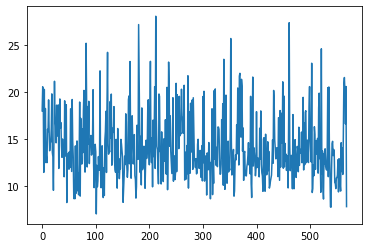

In [14]:
plt.plot(x[:,0])

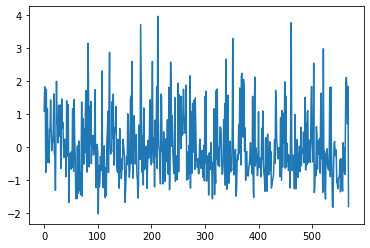

In [15]:
plt.plot(x_sc[:,0])

In [16]:
x_sc.shape

(569, 5)

In [17]:
y.shape

(569,)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y)

## Task 3 LogisticRegression

On your lecture hour you have learned two models this week - Logistic Regression and KNN. For this task you need to train Logictic Regression model - you always can reference [sklearn logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.
<br/> LogisticRegression() from sklearn package can fit binary, One-vs-Rest, or multinomial logistic regression with optional 
, 
 or Elastic-Net regularization.

Algorithm to use in the optimization problem.

<li>For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

<li>For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

<li>‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

<li>‘liblinear’ and ‘saga’ also handle L1 penalty

<li>‘saga’ also supports ‘elasticnet’ penalty

<li>‘liblinear’ does not support setting penalty='none'

Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

Task - Train LogisticRegression() model on your data, visualize predicted values. 

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logreg = LogisticRegression()

In [22]:
logreg.fit(x_train, y_train)

c:\users\godfather\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
logreg.classes_

array([0, 1], dtype=int64)

In [24]:
y_preds_logreg = logreg.predict(x_test)

In [25]:
y_preds_logreg

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [26]:
logreg.score(x_train, y_train)

0.9170854271356784

In [27]:
logreg.score(x_test, y_test)

0.8830409356725146

## Task 4 KNN

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

scikit-learn implements two different nearest neighbors classifiers: KNeighborsClassifier implements learning based on the  nearest neighbors of each query point, where  is an integer value specified by the user. RadiusNeighborsClassifier implements learning based on the number of neighbors within a fixed radius  of each training point, where  is a floating-point value specified by the user.

The -neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value  is highly data-dependent: in general a larger  suppresses the effects of noise, but makes the classification boundaries less distinct.

Reference the documentation to [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier) to use this model

Task - KNeighborsClassifier() model on your data, visualize predicted values. 

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn=KNeighborsClassifier()

In [30]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
y_preds_knn = knn.predict(x_test) 

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracies_knn={}
for n in range (3, 25, 2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_preds_knn = knn.predict(x_test)
    accuracies_knn[n] = accuracy_score(y_test, y_preds_knn)

In [34]:
accuracies_knn

{3: 0.8947368421052632,
 5: 0.8771929824561403,
 7: 0.8830409356725146,
 9: 0.8830409356725146,
 11: 0.8830409356725146,
 13: 0.8830409356725146,
 15: 0.8830409356725146,
 17: 0.8830409356725146,
 19: 0.8830409356725146,
 21: 0.8830409356725146,
 23: 0.8830409356725146}

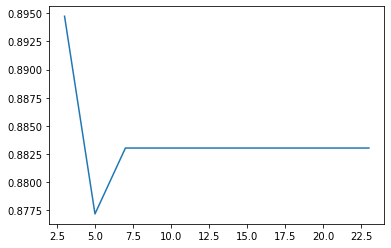

In [35]:
plt.plot(list(accuracies_knn.keys()),list(accuracies_knn.values()))

## Task 5 Metrics

As you train your classification predictive model, you will want to assess how good it is. Interestingly, there are many different ways of evaluating the performance. Scikit-learn contains many built-in functions for analyzing the performance of models. 

This task will cover the following metrics functions from `sklearn.metrics` :
    - confusion_matrix
    - accuracy_score
    - recall_score
    - precision_score
    - f1_score

Reference this [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

## confusion_matrix

Given an actual label and a predicted label, the first thing we can do is divide our samples in 4 buckets:
    - True positive - actual = 1, predicted = 1
    - False positive - actual = 1, predicted = 0
    - False negative - actual = 0, predicted = 1
    - True negative - actual = 0, predicted = 0

<img src="img/conf_matrix.png" alt="Drawing" style="width: 400px;"/>

We can obtain the confusion matrix (as a 2x2 array) from scikit learn, which takes as inputs the actual labels and the predicted labels

Task 5.1 - create confusion matrices for LogisticRegression() and  KNeighborsClassifier() models

In [36]:
from sklearn.metrics import confusion_matrix

In [51]:
c_m = confusion_matrix(y_test, y_preds_logreg)
c_m[1,0]

7

## accuracy_score

The most common metric for classification is accuracy, which is the fraction of samples predicted correctly as shown below: 

<img src="img/accuracy.png" alt="Drawing" style="width: 400px;"/>

We can obtain the accuracy score from scikit learn, which takes as inputs the actual labels and the predicted labels

Task 5.2 - calculate accuracy scores for LogisticRegression() and  KNeighborsClassifier() models

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test, y_preds_logreg)

0.8830409356725146

In [40]:
accuracy_score(y_test, y_preds_knn)

0.8830409356725146

## recall_score

Recall (also known as sensitivity) is the fraction of positives events that you predicted correctly as shown below:

<img src="img/recall.png" alt="Drawing" style="width: 300px;"/>

We can obtain the recall score from scikit-learn, which takes as inputs the actual labels and the predicted labels

Task 5.3 - calculate recall scores for LogisticRegression() and  KNeighborsClassifier() models

In [41]:
from sklearn.metrics import recall_score

In [42]:
recall_score(y_test, y_preds_logreg)

0.9345794392523364

In [43]:
recall_score(y_test, y_preds_knn)

0.9719626168224299

## precision_score

Precision is the fraction of predicted positives events that are actually positive as shown below:

<img src="img/precision.png" alt="Drawing" style="width: 300px;"/>

We can obtain the accuracy score from scikit-learn, which takes as inputs the actual labels and the predicted labels

Task 5.4 - calculate precision scores for LogisticRegression() and  KNeighborsClassifier() models

In [44]:
from sklearn.metrics import precision_score

In [45]:
precision_score(y_test, y_preds_logreg)

0.8849557522123894

In [46]:
precision_score(y_test, y_preds_knn)

0.859504132231405

## f1_score

The f1 score is the harmonic mean of recall and precision, with a higher score as a better model. The f1 score is calculated using the following formula:

<img src="img/f1_score.png" alt="Drawing" style="width: 400px;"/>

We can obtain the f1 score from scikit-learn, which takes as inputs the actual labels and the predicted labels

Task 5.5 - calculate f1_scores for LogisticRegression() and  KNeighborsClassifier() models

In [47]:
from sklearn.metrics import f1_score


In [48]:
f1_score(y_test, y_preds_logreg)

0.9090909090909091

In [49]:
f1_score(y_test, y_preds_knn)

0.912280701754386

## Task 6 Conclusion

Now, as you have calculated main metrics for each model - analyze them and make a conclusion which model performs better and why

During this lab work we have understood that it is crucial to select correct dataset, as primarily we have chosen dataset where y values were not binary. As a result we had problems with confusion matrix, that is what we want to ask you about on the following lecture.

After choosing suitable dataset, we have calculated accuracy_score, recall_score, precision_score, f1_score. As result we can see that LogReg and KNN are both pretty accurate, each performs better, but commonly KNN is more accurate, as we can adjust amount of neighbors, to increase accuracy.